## Conducting EDA to understand the driving factors behind loan default

## Importing Necessary Libraries

Below are the libraries that are used in order to perform EDA (Exploratory data analysis) 

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Loading

Loading the data into the data frame

In [2]:
df=pd.read_csv("loan.csv")

## Data Cleaning

Check whether there is any headers/footers or summery details rows. If they are present, we need to delete them. 

In [3]:
#Check whether there is any headers 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Number of rows is 39717 and columns is 111
df.shape

(39717, 111)

In [5]:
#Check whether there is any footers or summery details rows
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Delete unneccessary columns

In [6]:
# Percentage of missing values in each column
round(100*df.isnull().mean(),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

#### It is observed that there are a lot of columns with all null values. Let's first remove all of them

In [7]:
print(f"Total columns with values NA: {len(df.columns[df.isna().any()].tolist())}")  # Call tolist() method here
na_columns = list(df.columns[df.isna().any()])
print("NA columns List:")
print(na_columns)

Total columns with values NA: 68
NA columns List:
['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq', 'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_

In [8]:
# Delete the columns which have all columns as na
df = df.dropna(axis=1, how="all")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
df.shape

(39717, 57)

#### Delete columns which have unique values. The unique values does not add any value when performing the analysis. 

In [10]:
# Check if each column has unique values
unique_values_per_column = df.nunique()

# Check if the number of unique values equals the total number of rows
columns_with_unique_values = unique_values_per_column[unique_values_per_column == len(df)]

# Print the columns with unique values
print("Columns with unique values:")
print(columns_with_unique_values)

Columns with unique values:
id           39717
member_id    39717
url          39717
dtype: int64


In [11]:
df.drop(['id', 'member_id', 'url'], axis=1, inplace=True)

In [12]:
df.shape

(39717, 54)

#### lets delete the columns which have tex / description values because they don't contribute for analysis

In [13]:
df.drop(columns=['desc', 'title'], inplace=True)
df.shape

(39717, 52)

#### Since we limit our analysis till Grade level, we can remove the sub grade column


In [14]:
df = df.drop(['sub_grade'], axis=1)
df.shape

(39717, 51)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   emp_title                   37258 non-null  object 
 8   emp_length                  38642 non-null  object 
 9   home_ownership              39717 non-null  object 
 10  annual_inc                  39717 non-null  float64
 11  verification_status         39717 non-null  object 
 12  issue_d                     39717 non-null  object 
 13  loan_status                 397

#### Behavioral values are captured and they are post loan approval data. So, they will not be useful during the loan approval process. Hence, removing those columns

In [16]:
behavioural_cols = ["delinq_2yrs", "earliest_cr_line", "last_pymnt_amnt", "inq_last_6mths", "open_acc", "pub_rec", 
                    "revol_bal", "revol_util", "total_acc", "out_prncp" , "out_prncp_inv", "total_pymnt",
                    "total_pymnt_inv", "total_rec_late_fee", "recoveries", "collection_recovery_fee",
                    "application_type", "last_pymnt_d", "last_credit_pull_d", "total_rec_prncp", "total_rec_int"]
df = df.drop(behavioural_cols, axis=1)
df.shape

(39717, 30)

#### There are several columns which are single valued. 
- They cannot contribute to our analysis in any way. So removing them.

In [17]:
df.nunique().sort_values()

pymnt_plan                        1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
tax_liens                         1
term                              2
next_pymnt_d                      2
verification_status               3
loan_status                       3
pub_rec_bankruptcies              3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
addr_state                       50
issue_d                          55
mths_since_last_delinq           95
mths_since_last_record          111
int_rate                        371
zip_code                        823
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv             

In [18]:
# if the column values single valued, we can remove it because it does not add any value when preforming analysis
for column in df.columns:
    if df[column].nunique(dropna=True) == 1:
        print(column)
        df = df.drop(column, axis=1)
df.shape        

pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
acc_now_delinq
chargeoff_within_12_mths
delinq_amnt
tax_liens


(39717, 22)

#### Dropping the columns which have more than 50% of values are missing

In [19]:
# Dropping the columns which have more than 50% of value is null
total_rows = len(df)
for column in df.columns:
    print(f"{column} = {df[column].isna().mean().round(2)}")
    if(100*df[column].isna().mean().round(2)) >= 50:
        df = df.drop(column, axis=1)

df.shape

loan_amnt = 0.0
funded_amnt = 0.0
funded_amnt_inv = 0.0
term = 0.0
int_rate = 0.0
installment = 0.0
grade = 0.0
emp_title = 0.06
emp_length = 0.03
home_ownership = 0.0
annual_inc = 0.0
verification_status = 0.0
issue_d = 0.0
loan_status = 0.0
purpose = 0.0
zip_code = 0.0
addr_state = 0.0
dti = 0.0
mths_since_last_delinq = 0.65
mths_since_last_record = 0.93
next_pymnt_d = 0.97
pub_rec_bankruptcies = 0.02


(39717, 19)

#### Deleting emp_title as its description or textual informations and doesn't participate in analysis

In [20]:
#Deleting emp_title as its description or textual informations and doesn't participate in analysis
df = df.drop(['emp_title'], axis=1)

#### Since zip_code is not much useful this analysis, we can drop it. 

In [21]:
#Since zip_code is not much useful this analysis, we can drop it. 
df = df.drop(['zip_code'], axis=1)

## Check duplicate rows

This is often a handy thing to do because a huge data might have some duplicate rows which might be disturbing analysis. If dataset contains the duplicate rows, we need to drop them. 

In [22]:
# Check if there is any duplicate rows
duplicate_rows = len(df[df.duplicated()])
print(f'duplicate rows count = {duplicate_rows}')

duplicate rows count = 0


#### Check the Target Variable
Check whether there is any unnessary rows present in the target variable 'Loan Status'. If there is any unessary rows are present, we need to remove them

In [23]:
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

Dropping the rows if ‘loan_status’ == ‘Current’ because the applicant is paying the loan and we cannot make any descion such as whether the applicant is defaulted or not. 

In [24]:
df = df[df['loan_status'] != 'Current']
df.shape

(38577, 17)

## Data Conversion

In [25]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [26]:
#check the data type in the 'term' column
df['term'].value_counts()

term
 36 months    29096
 60 months     9481
Name: count, dtype: int64

In [27]:
# convert the values which is 'string' into 'int' in the 'term' column
def clean_term(term):
    return int(term.strip().split()[0])

df['term'] = df['term'].apply(clean_term) ## removing the string parts of int value
df['term'].dtype

dtype('int64')

In [28]:
# check the data type in the 'int_rate' column
df['int_rate'].value_counts()

int_rate
10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
         ... 
16.96%      1
18.36%      1
16.15%      1
16.01%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [29]:
# convert the values which is 'string' into 'int' in the 'int_rate' column
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)

In [30]:
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [31]:
# convert 'loan_amnt' and 'funded_amnt'
df = df.astype({'loan_amnt': 'float', 'funded_amnt': 'float'})
df.dtypes

loan_amnt               float64
funded_amnt             float64
funded_amnt_inv         float64
term                      int64
int_rate                float64
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

In [32]:
df['grade'].value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

In [33]:
df['emp_length'].value_counts()

emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [34]:
# convert issue_d to date type
df['issue_d'] = pd.to_datetime(df.issue_d, format='%b-%y')
df['issue_d']

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39712   2007-07-01
39713   2007-07-01
39714   2007-07-01
39715   2007-07-01
39716   2007-06-01
Name: issue_d, Length: 38577, dtype: datetime64[ns]

## Checking the Missing Values

In [35]:
# check missing values in each column
round(100*df.isnull().mean(),2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.81
dtype: float64

## Imputing / Dropping the rows 

When checking the dataset for missing values, we can notice that the 'pub_rec_bankrupticies' column has 1.81% missing values, and the 'revol_util' column has 0.13%. Since the percentage of missing values in both columns is relatively low, we can to drop the rows containing missing values in the respective columns.


In [36]:
df.dropna(subset=['emp_length', "pub_rec_bankruptcies"], inplace=True)
df.shape

(36847, 17)

In [37]:
# check missing values in each column
round(100*df.isnull().mean(),2)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
pub_rec_bankruptcies    0.0
dtype: float64

In [38]:
def strip_emp_length(x):
    x = x.strip("years")
    x = x.strip("<")
    x = x.replace(" ", "")
    x = x.replace("+", "")
    return x

df['emp_length'] = df["emp_length"].apply(strip_emp_length)

## Derived Columns

Creating a dervied columns such as issue month and issue year from issue date

In [39]:
df['issue_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_month'] = pd.DatetimeIndex(df['issue_d']).month

In [40]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
0,5000.0,5000.0,4975.0,36,10.65,162.87,B,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12
2,2400.0,2400.0,2400.0,36,15.96,84.33,C,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12
3,10000.0,10000.0,10000.0,36,13.49,339.31,C,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12
5,5000.0,5000.0,5000.0,36,7.90,156.46,A,3,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  float64       
 1   funded_amnt           36847 non-null  float64       
 2   funded_amnt_inv       36847 non-null  float64       
 3   term                  36847 non-null  int64         
 4   int_rate              36847 non-null  float64       
 5   installment           36847 non-null  float64       
 6   grade                 36847 non-null  object        
 7   emp_length            36847 non-null  object        
 8   home_ownership        36847 non-null  object        
 9   annual_inc            36847 non-null  float64       
 10  verification_status   36847 non-null  object        
 11  issue_d               36847 non-null  datetime64[ns]
 12  loan_status           36847 non-null  object        
 13  purpose              

#### Column metadata used by functions below

In [42]:
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investers',
    'term': 'Loan Terms',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankrupticies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Invester Funded Bins',
    'annual_inc_b': 'Funded Amount Bins',
    'int_rate_b': 'Interst Rate Bins',
    'dti_b': 'DTI Bins'
}

#### Buketting Loan Amount

In [43]:
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K' # 25% quartile
    elif (column > 5000) and (column <= 10000):
        return '5K - 10K'
    elif (column > 10000) and (column <= 15000):
        return '10K - 15K'
    elif (column > 15000) and (column <= 20000):
        return '15K - 20K'
    elif (column > 20000) and (column <= 25000):
        return '20K - 25K'
    elif (column > 25000) and (column <= 30000):
        return '25K - 30K'
    else:
        return '30K - above' # 75% quartitle
    
df['loan_amnt_b'] = df.apply(lambda x: bucket_loan_amnt(x['loan_amnt']), axis=1)

#### Buketting annual income

In [44]:
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40K' # 25% quartile
    elif (column > 40000) and (column <= 50000):
        return '40K - 50K'
    elif (column > 50000) and (column <= 60000):
        return '50K - 60K'
    elif (column > 60000) and (column <= 70000):
        return '60K - 70K'
    elif (column > 70000) and (column <= 80000):
        return '70K - 80K'
    else:
        return '80K - above' # 75% quartitle
    
df['annual_inc_b'] = df.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis=1)

#### Buketting interest rate

In [45]:
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column > 9) and (column <= 11):
        return 'Low'
    elif (column > 11) and (column <= 13):
        return 'Moderate'
    elif (column > 13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartitle
    
df['int_rate_b'] = df.apply(lambda x: bucket_int_rate(x['int_rate']), axis=1)

#### Buketting dti

In [46]:
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column > 8) and (column <= 12):
        return 'Low'
    elif (column > 12) and (column <= 16):
        return 'Moderate'
    elif (column > 16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartitle
    
df['dti_b'] = df.apply(lambda x: bucket_dti(x['dti']), axis=1)

In [47]:
df.head(20)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt_b,annual_inc_b,int_rate_b,dti_b
0,5000.0,5000.0,4975.00000,36,10.65,162.87,B,10,RENT,24000.00,...,credit_card,AZ,27.65,0.0,2011,12,0 - 5K,0 - 40K,Low,Very High
1,2500.0,2500.0,2500.00000,60,15.27,59.83,C,1,RENT,30000.00,...,car,GA,1.00,0.0,2011,12,0 - 5K,0 - 40K,Very High,Very Low
2,2400.0,2400.0,2400.00000,36,15.96,84.33,C,10,RENT,12252.00,...,small_business,IL,8.72,0.0,2011,12,0 - 5K,0 - 40K,Very High,Low
3,10000.0,10000.0,10000.00000,36,13.49,339.31,C,10,RENT,49200.00,...,other,CA,20.00,0.0,2011,12,5K - 10K,40K - 50K,High,High
5,5000.0,5000.0,5000.00000,36,7.90,156.46,A,3,RENT,36000.00,...,wedding,AZ,11.20,0.0,2011,12,0 - 5K,0 - 40K,Very Low,Low
6,7000.0,7000.0,7000.00000,60,15.96,170.08,C,8,RENT,47004.00,...,debt_consolidation,NC,23.51,0.0,2011,12,5K - 10K,40K - 50K,Very High,Very High
7,3000.0,3000.0,3000.00000,36,18.64,109.43,E,9,RENT,48000.00,...,car,CA,5.35,0.0,2011,12,0 - 5K,40K - 50K,Very High,Very Low
8,5600.0,5600.0,5600.00000,60,21.28,152.39,F,4,OWN,40000.00,...,small_business,CA,5.55,0.0,2011,12,5K - 10K,0 - 40K,Very High,Very Low
9,5375.0,5375.0,5350.00000,60,12.69,121.45,B,1,RENT,15000.00,...,other,TX,18.08,0.0,2011,12,5K - 10K,0 - 40K,Moderate,High
10,6500.0,6500.0,6500.00000,60,14.65,153.45,C,5,OWN,72000.00,...,debt_consolidation,AZ,16.12,0.0,2011,12,5K - 10K,70K - 80K,High,High


## Check unique values in each column

Based on the count, we can determine whether the variables come under Categorial or Numerical. 

In [48]:
df.nunique()

loan_amnt                 856
funded_amnt              1010
funded_amnt_inv          7606
term                        2
int_rate                  336
installment             14406
grade                       7
emp_length                 10
home_ownership              4
annual_inc               4943
verification_status         3
issue_d                    52
loan_status                 2
purpose                    14
addr_state                 49
dti                      2848
pub_rec_bankruptcies        3
issue_year                  5
issue_month                12
loan_amnt_b                 7
annual_inc_b                6
int_rate_b                  5
dti_b                       5
dtype: int64

In [49]:
numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
categorical_cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

## Univarients Analysis

### Checking and removing outliers in the numerical columns

Boxplot of Loan Amount


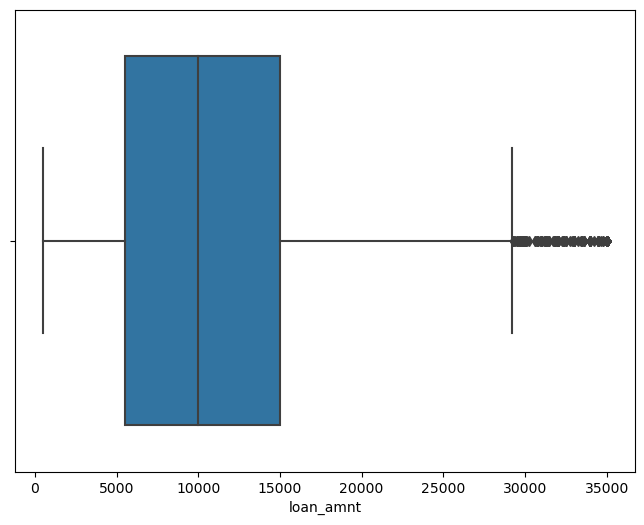

Boxplot of Funded Amount


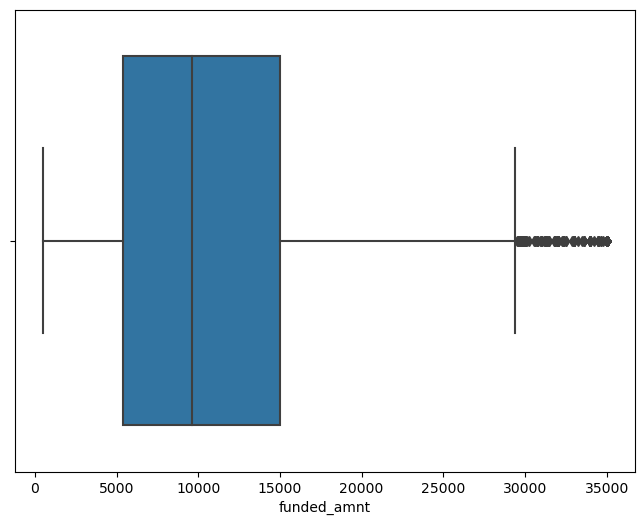

Boxplot of Funded Amount Investers


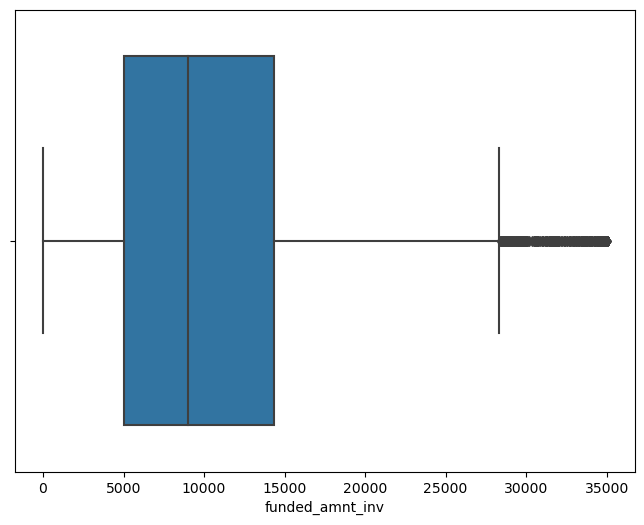

Boxplot of Interest Rate


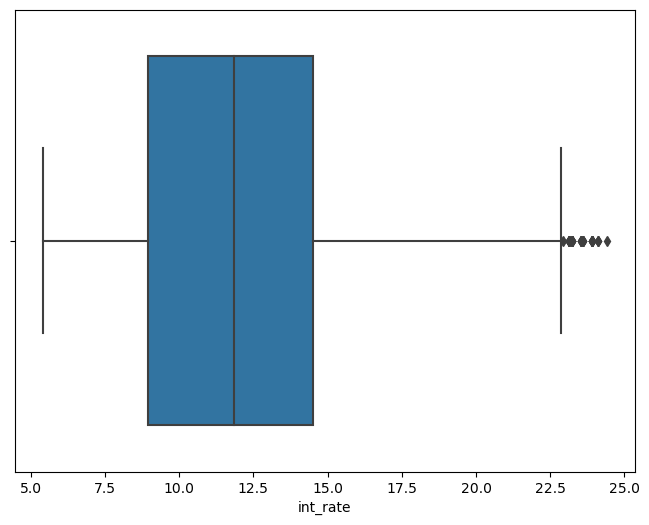

Boxplot of Installment


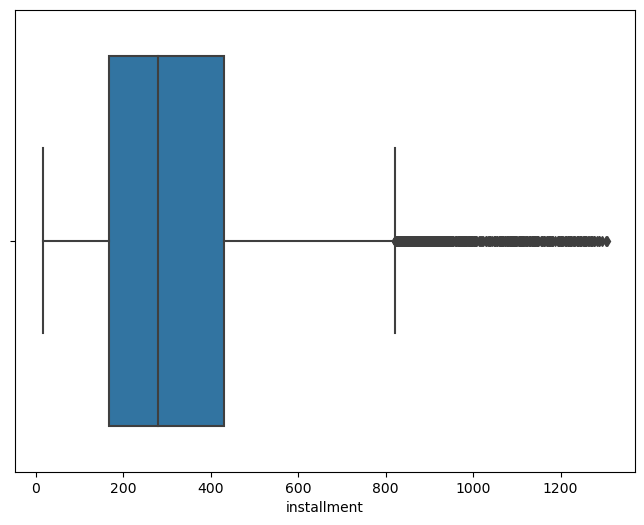

Boxplot of Annual Income


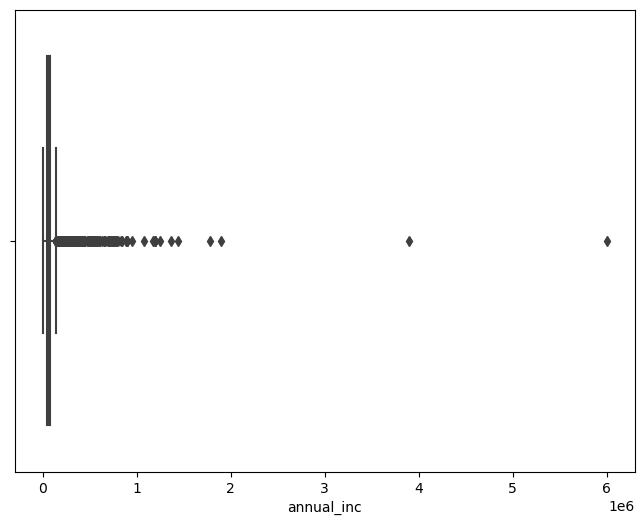

Boxplot of Debt To Income Ratio


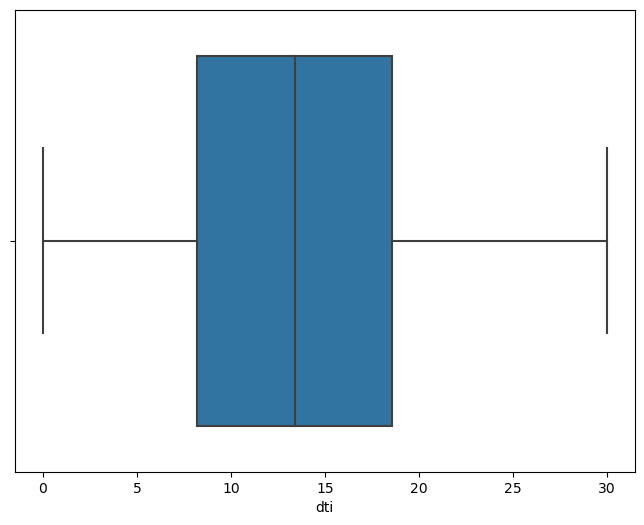

In [50]:
for col in numerical_cols:
    print("Boxplot of",column_titles[col])
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.show()

In [51]:
df.shape

(36847, 23)

#### Removing outliers

In [52]:
numerical_cols = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc']

# Function to remove outliers from a column
def remove_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df.loc[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
    return df_filtered


# Loop through numerical columns and remove outliers
for col in numerical_cols:
    df = remove_outliers(df, col)
    
df.shape

(33191, 23)

Boxplot of Loan Amount


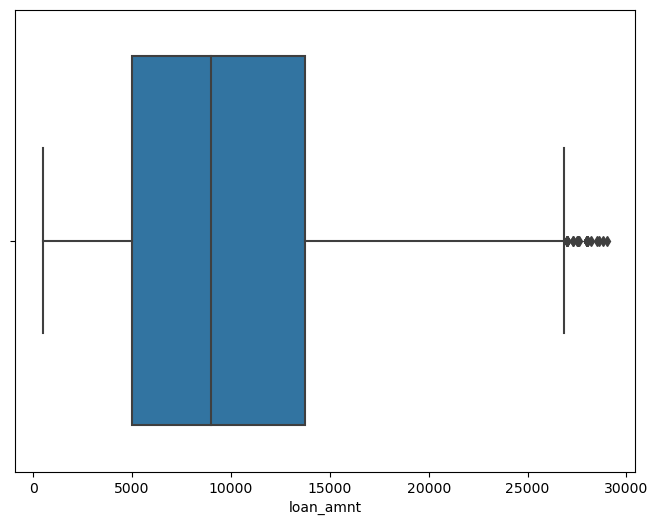

Boxplot of Funded Amount


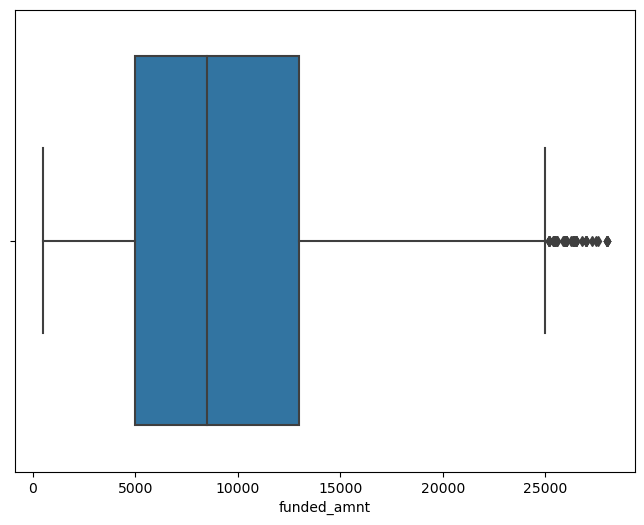

Boxplot of Funded Amount Investers


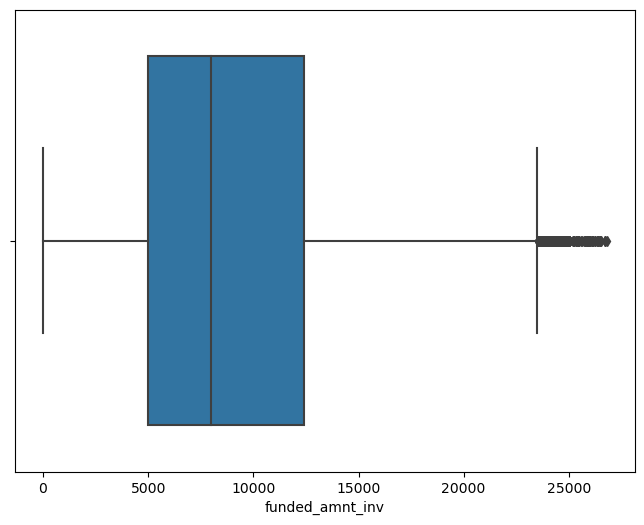

Boxplot of Interest Rate


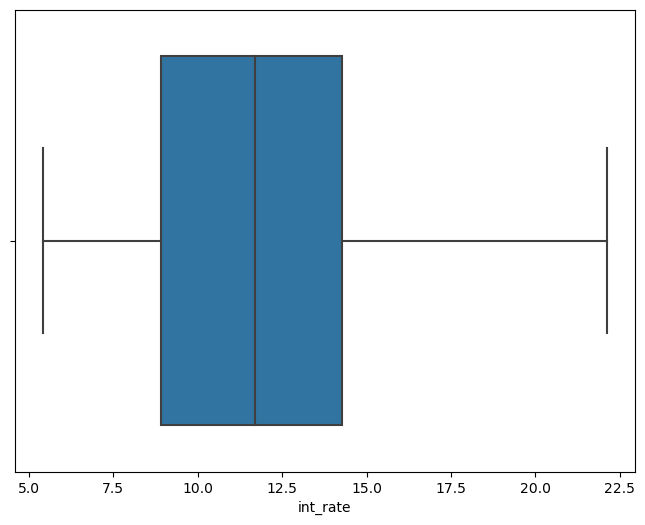

Boxplot of Installment


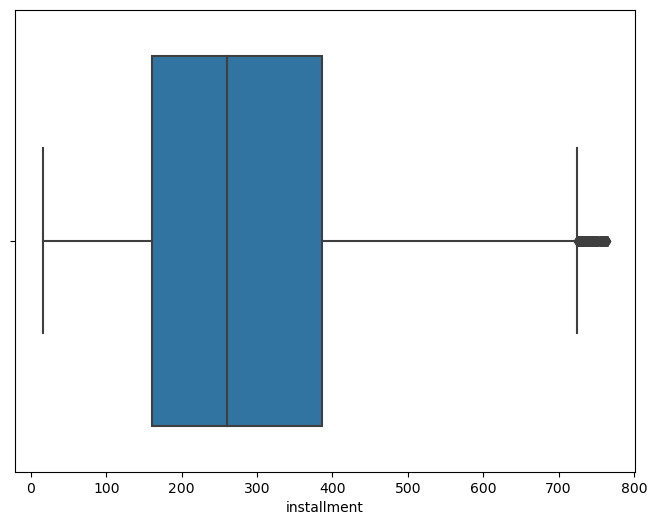

Boxplot of Annual Income


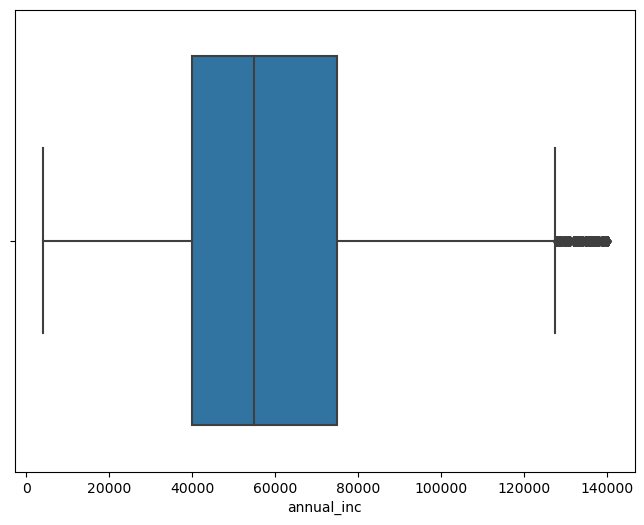

In [53]:
#Check after removing the outliers 
for col in numerical_cols:
    print("Boxplot of",column_titles[col])
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.show()

In [54]:
def plot_diagram(df, column):
    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()

### Numerical Analysis

Plots of Loan Amount:


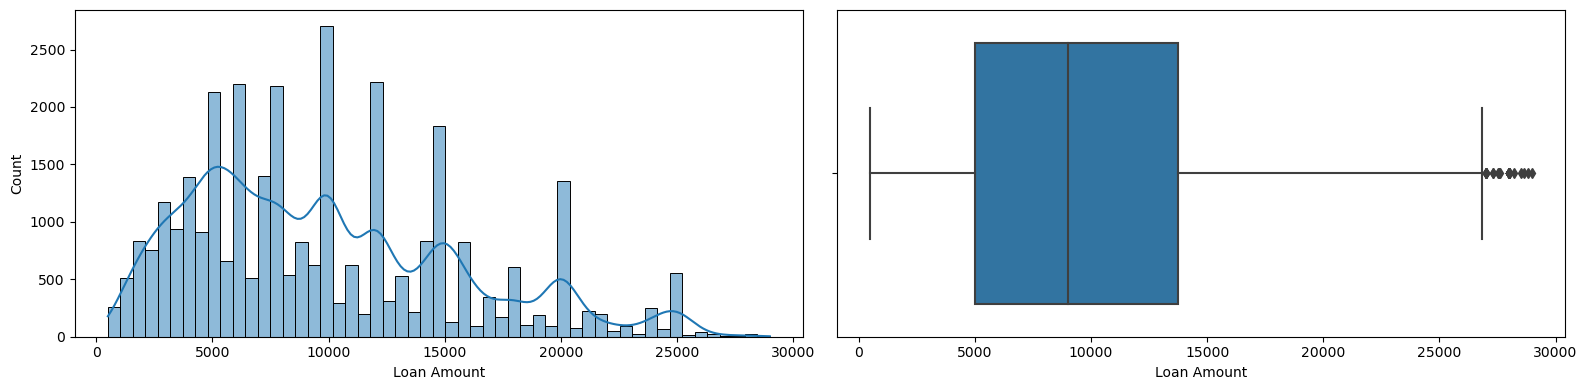

count    33191.000000
mean      9820.838480
std       5809.600807
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13750.000000
max      29000.000000
Name: loan_amnt, dtype: float64



Plots of Funded Amount:


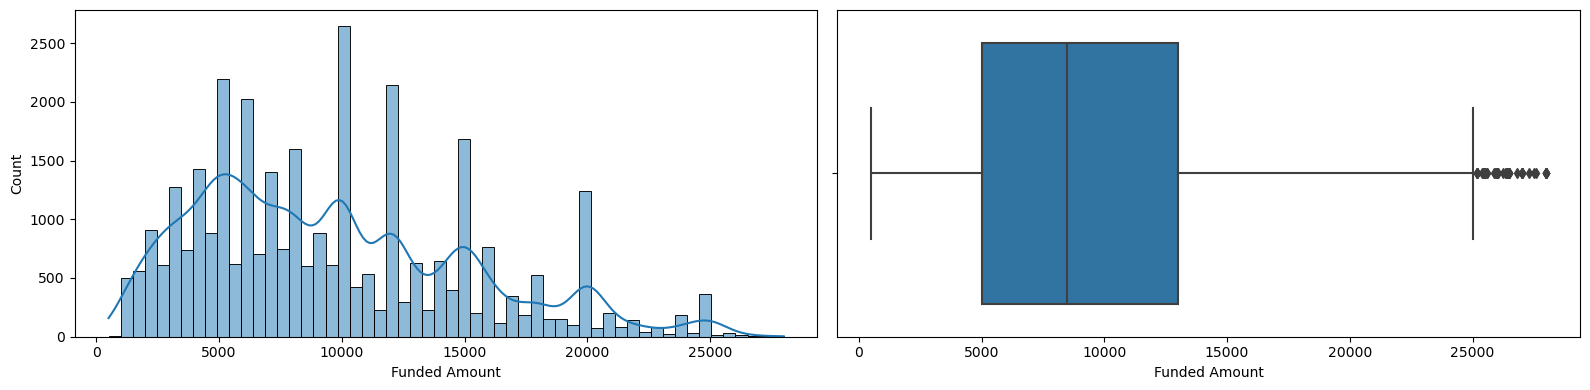

count    33191.000000
mean      9593.825887
std       5565.574327
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64



Plots of Interest Rate:


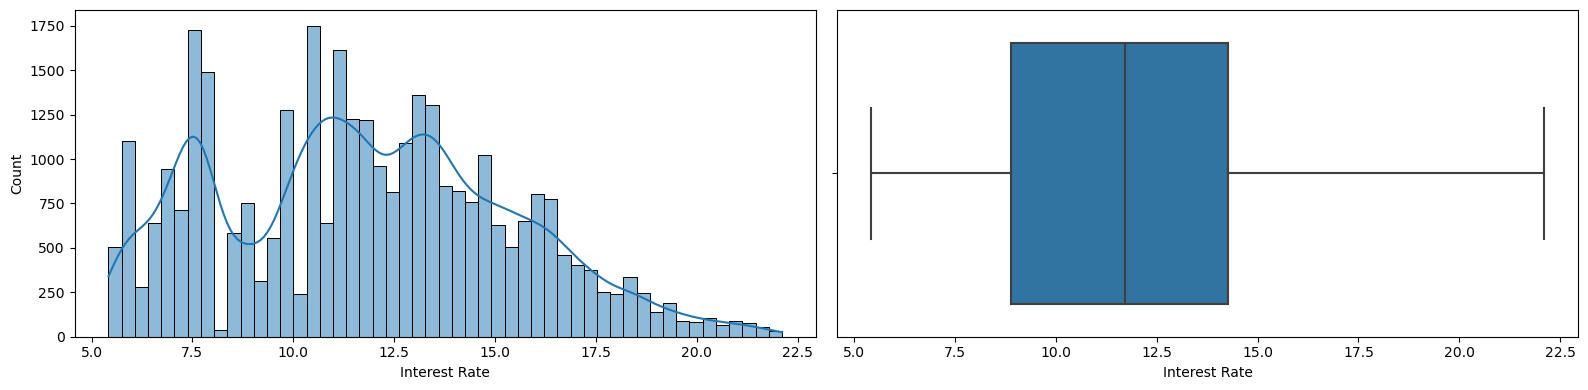

count    33191.000000
mean        11.782783
std          3.591944
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         22.110000
Name: int_rate, dtype: float64



Plots of Annual Income:


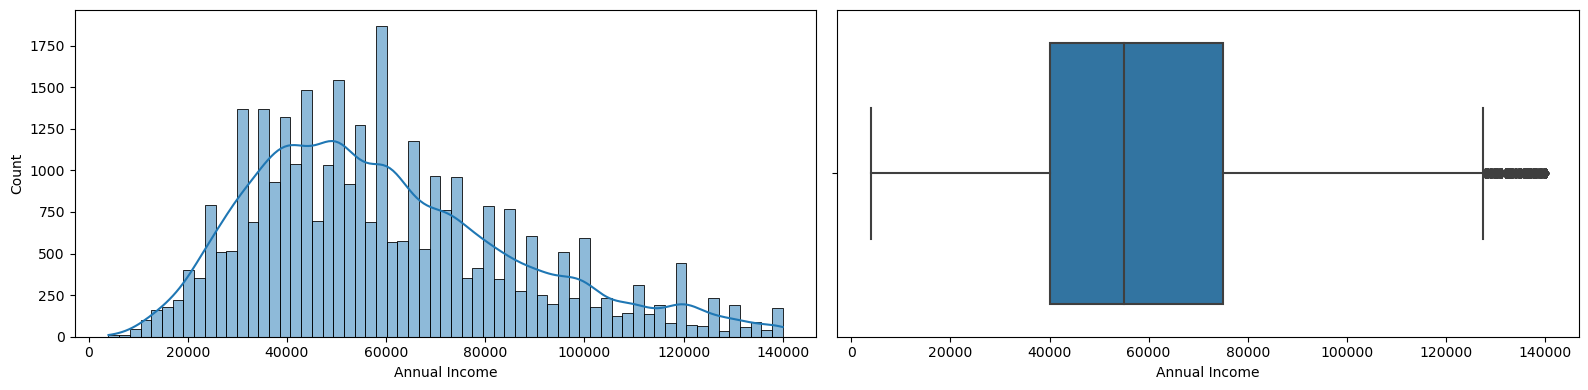

count     33191.000000
mean      59883.284700
std       26916.857415
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64



Plots of Debt To Income Ratio:


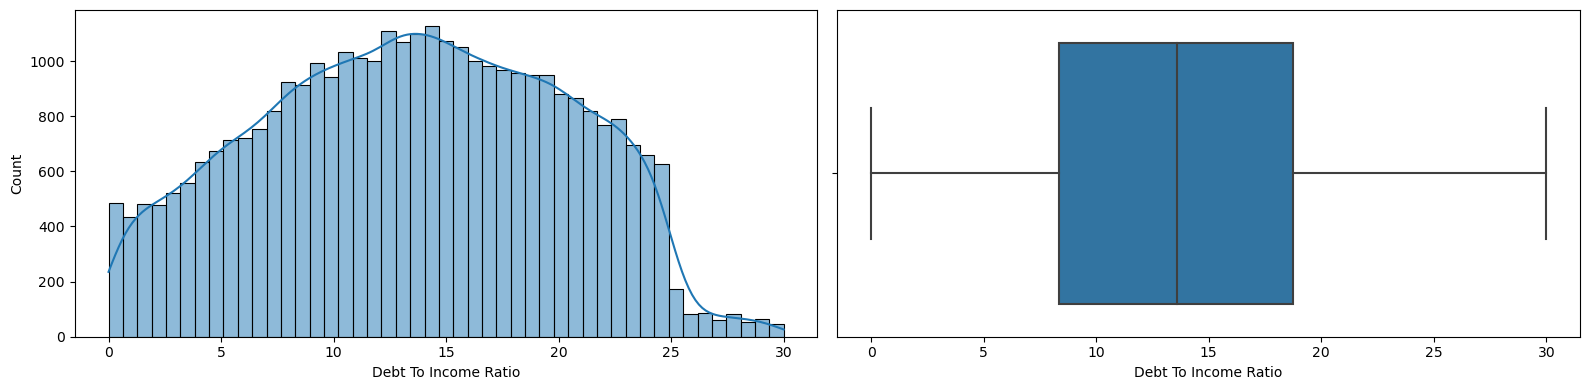

count    33191.000000
mean        13.463454
std          6.651684
min          0.000000
25%          8.360000
50%         13.570000
75%         18.730000
max         29.990000
Name: dti, dtype: float64





In [55]:
numerical_cols = ['loan_amnt', 'funded_amnt', 'int_rate', 'annual_inc', 'dti']
for col in numerical_cols:
    print(f"Plots of {column_titles[col]}:")
    plot_diagram(df, col)
    print(df[col].describe()) # Print the summary statistics
    print("\n\n")
   

#### Observations: 

#### Loan amount:
- Most of the loan amount applied is in the range of 5k-14k.
- Max Loan amount is approximately 29k.

#### Funded amount:
- Most of the Funded amount is in the range of 5k-13k.
- Max Funded amount is approximately 28k.

#### Interest Rate:
- Most of the interest rate is in the range of 9%-14%.
- Max interest is approximately 22%.

#### Annual Income:
- Most of the Annual income of applicant is in the range of 40k-75k.
- Max Annal income of applicant is approximately 1.4L.

#### DTI:
- Most of the DTI is in the range of 8%-18%.
- Max DTI is approximately 30%.

## Unordered Categorical Variable analysis

### Home ownership

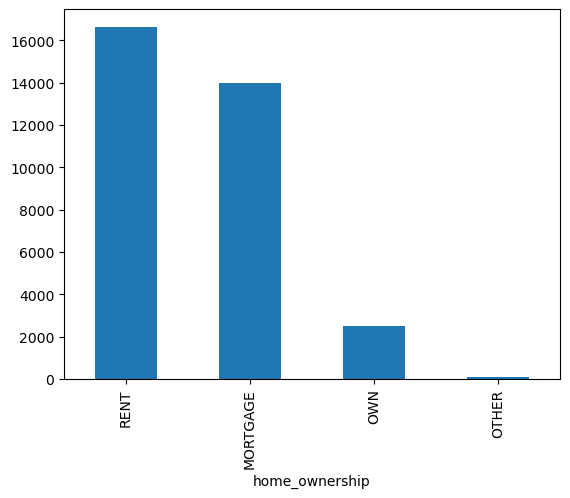

In [56]:
df['home_ownership'].value_counts().plot.bar()
plt.show()

#### Obervations:

Majority of loan applicants are either livess on Rent or Mortgage

### Purpose

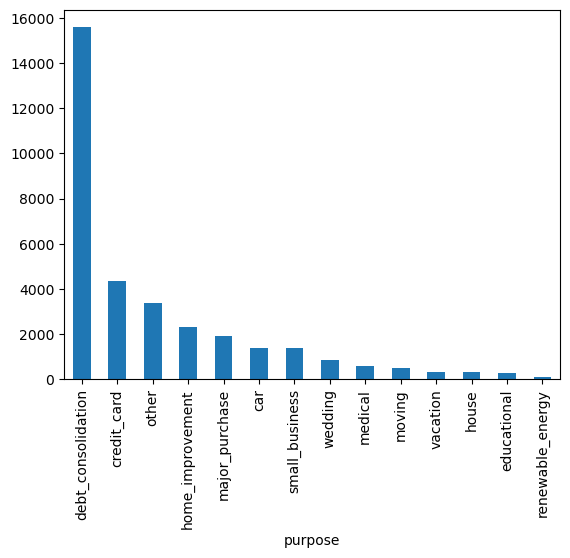

In [57]:
df['purpose'].value_counts().plot.bar()
plt.show()

#### Obervations:

Majority of purpose of loan applicants are dept_consolication

### Address State

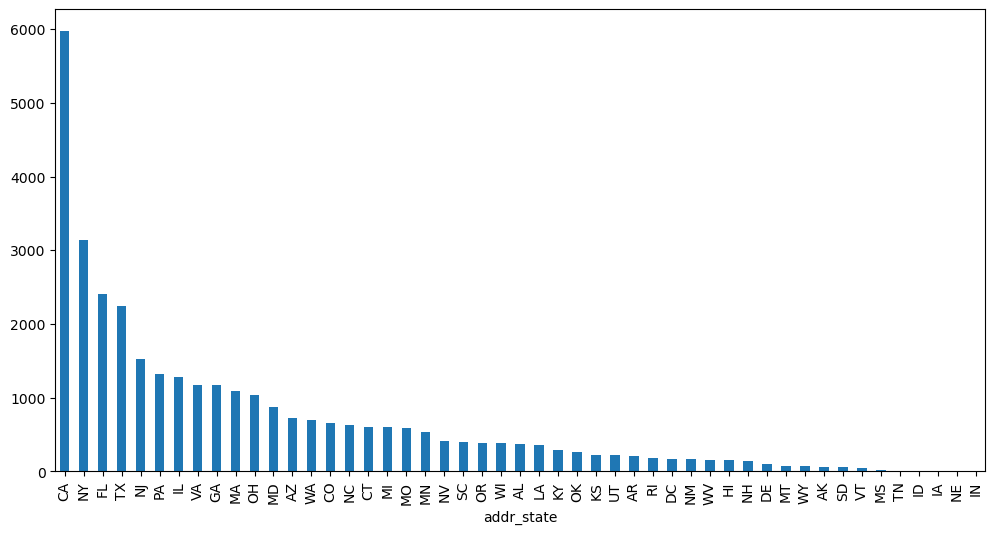

In [58]:
plt.figure(figsize=(12, 6))
df['addr_state'].value_counts().plot.bar()
plt.show()

#### Obervations:

Majority of loan applicants are from CA state

### Verification Status

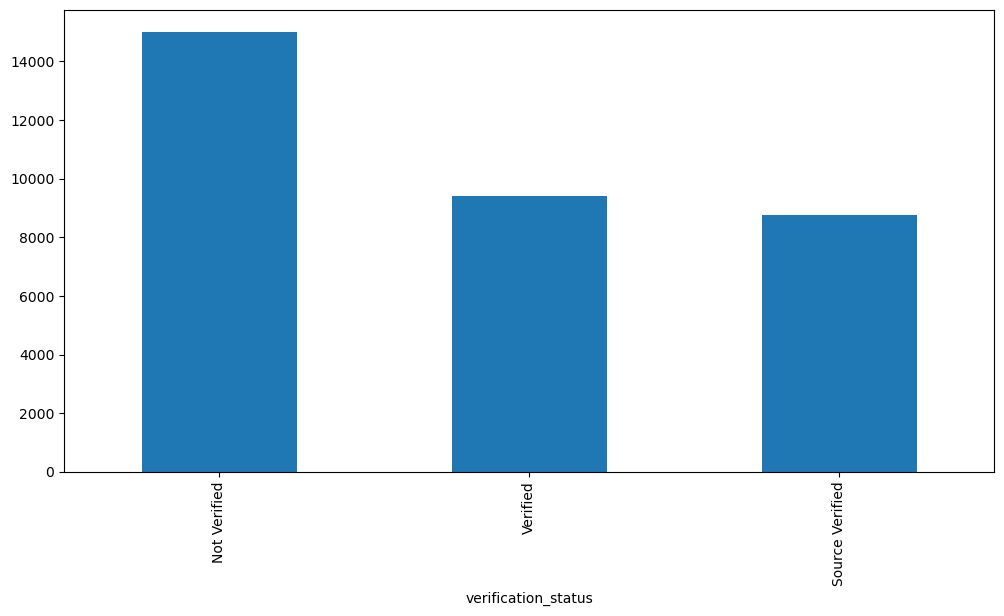

In [59]:
plt.figure(figsize=(12, 6))
df['verification_status'].value_counts().plot.bar()
plt.show()

#### Obervations:

Majority of loan applicants are not verfified

### Term

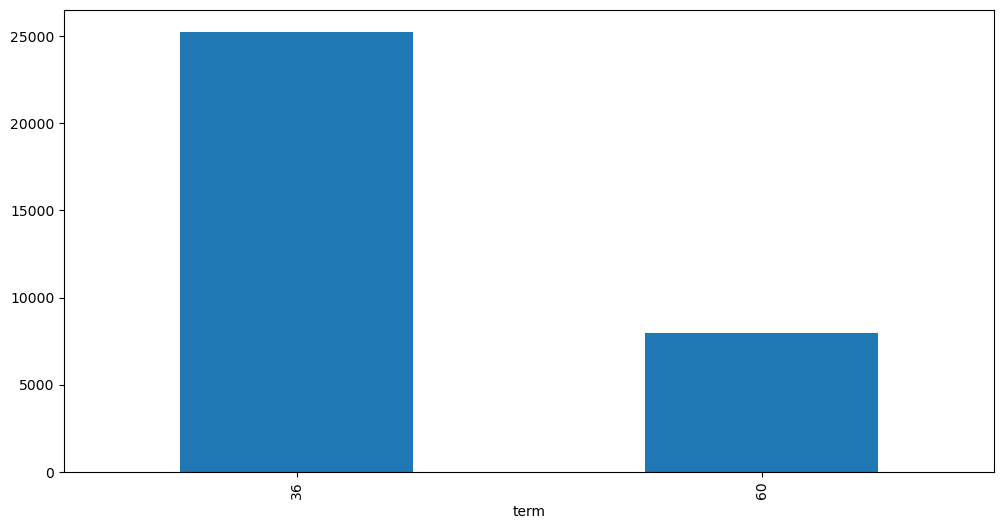

In [60]:
plt.figure(figsize=(12, 6))
df['term'].value_counts().plot.bar()
plt.show()

#### Obervations:

Majority of loan applicants come under 36 month term

## Ordered Categorical Variable analysis

### Employment Length

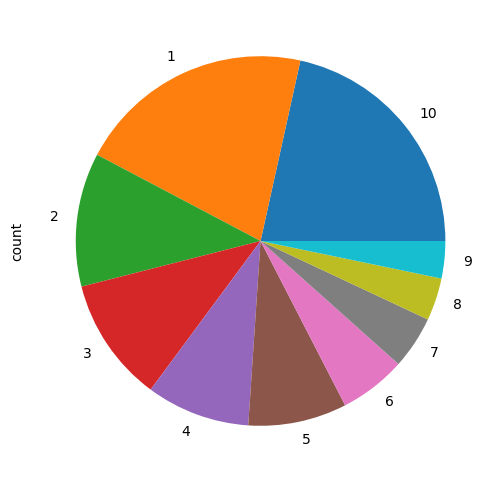

In [61]:
plt.figure(figsize=(6, 6))
df['emp_length'].value_counts().plot(kind='pie')
plt.show()

#### Obervations:

Majority of loan applicants are 10+ years of experence

### Grade

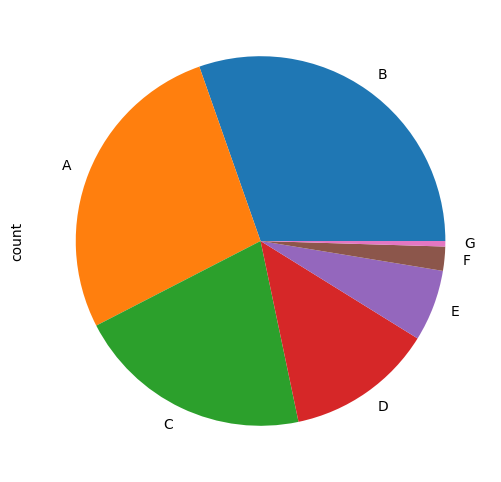

In [62]:
plt.figure(figsize=(6, 6))
df['grade'].value_counts().plot(kind='pie')
plt.show()

#### Obervations:

Majority of loan applicants are come under either A or B grade

## Segmented Univariate Analysis

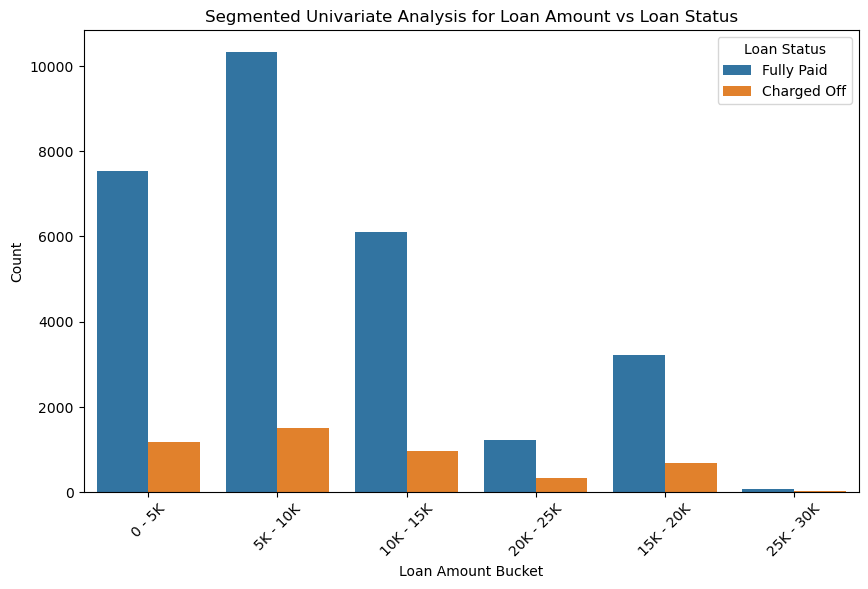

In [63]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan_amnt_b', hue='loan_status')
plt.title('Segmented Univariate Analysis for Loan Amount vs Loan Status')
plt.xlabel('Loan Amount Bucket')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

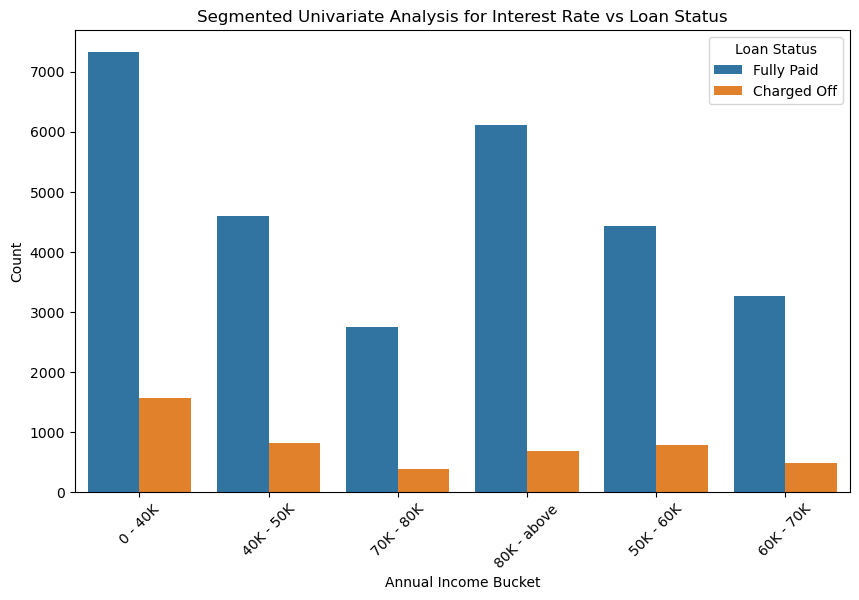

In [64]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='annual_inc_b', hue='loan_status')
plt.title('Segmented Univariate Analysis for Interest Rate vs Loan Status')
plt.xlabel('Annual Income Bucket')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

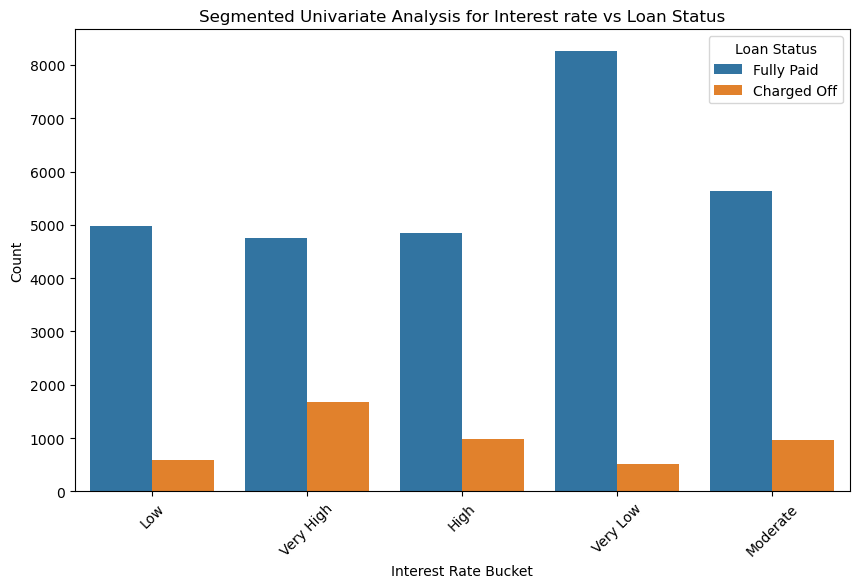

In [65]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='int_rate_b', hue='loan_status')
plt.title('Segmented Univariate Analysis for Interest rate vs Loan Status')
plt.xlabel('Interest Rate Bucket')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

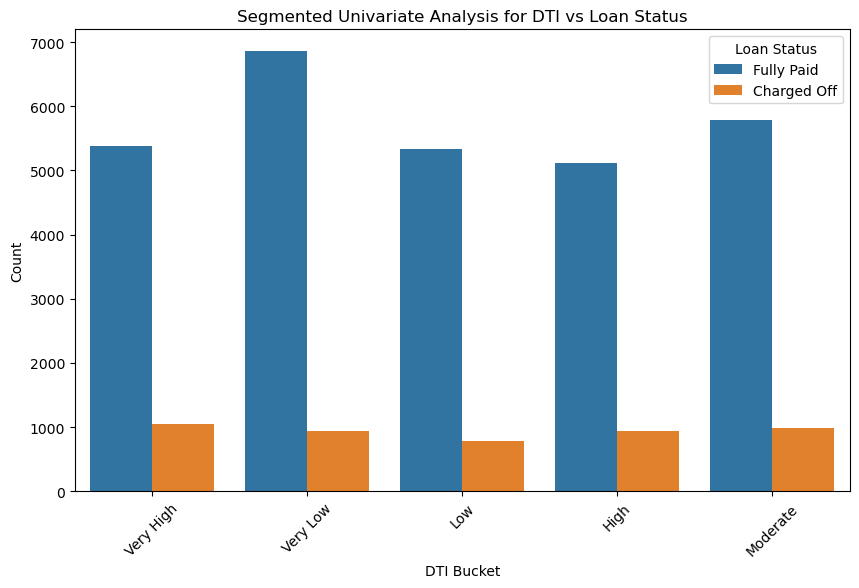

In [66]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dti_b', hue='loan_status')
plt.title('Segmented Univariate Analysis for DTI vs Loan Status')
plt.xlabel('DTI Bucket')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

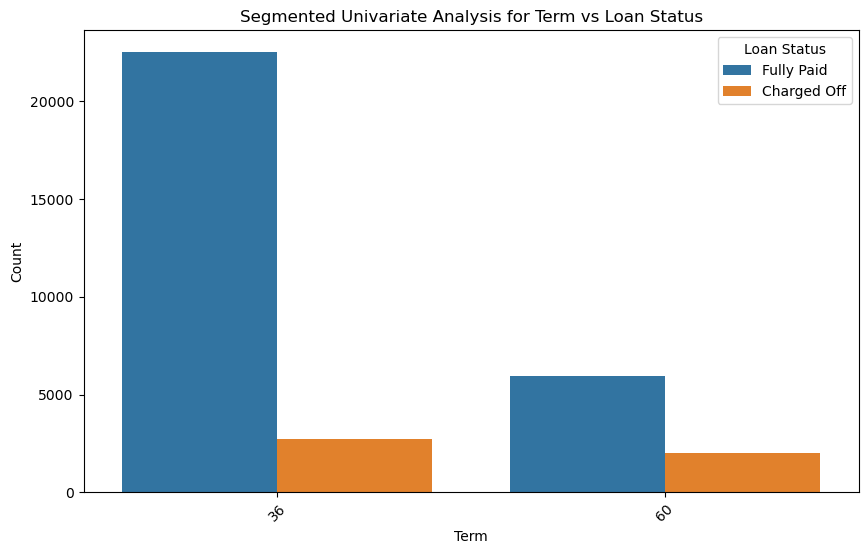

In [67]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term', hue='loan_status')
plt.title('Segmented Univariate Analysis for Term vs Loan Status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

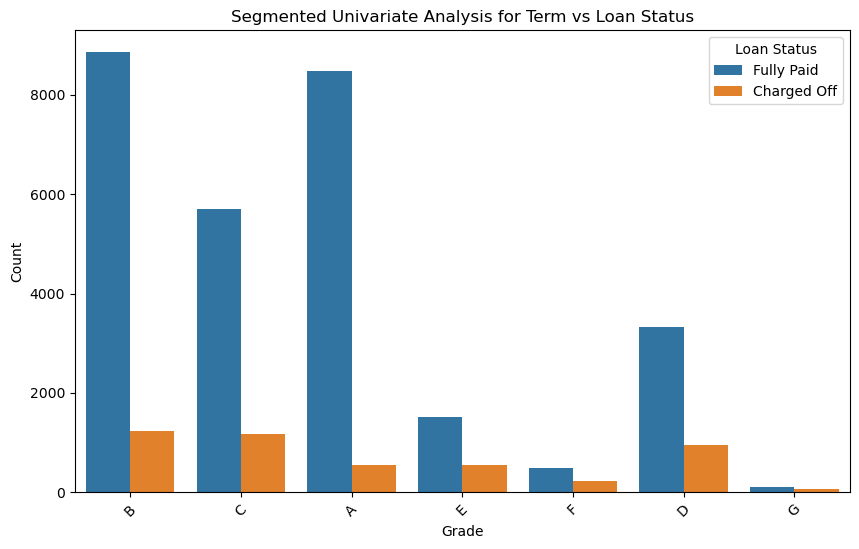

In [68]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='grade', hue='loan_status')
plt.title('Segmented Univariate Analysis for Term vs Loan Status')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

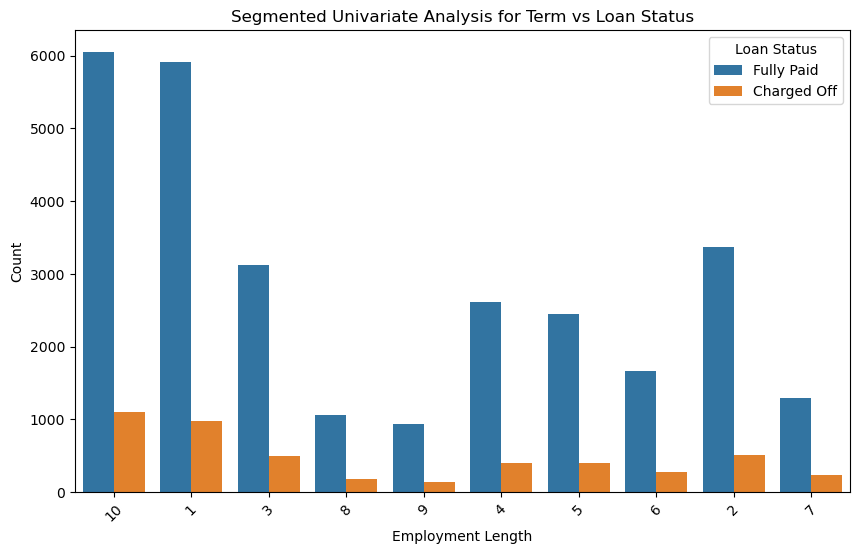

In [69]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='emp_length', hue='loan_status')
plt.title('Segmented Univariate Analysis for Term vs Loan Status')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

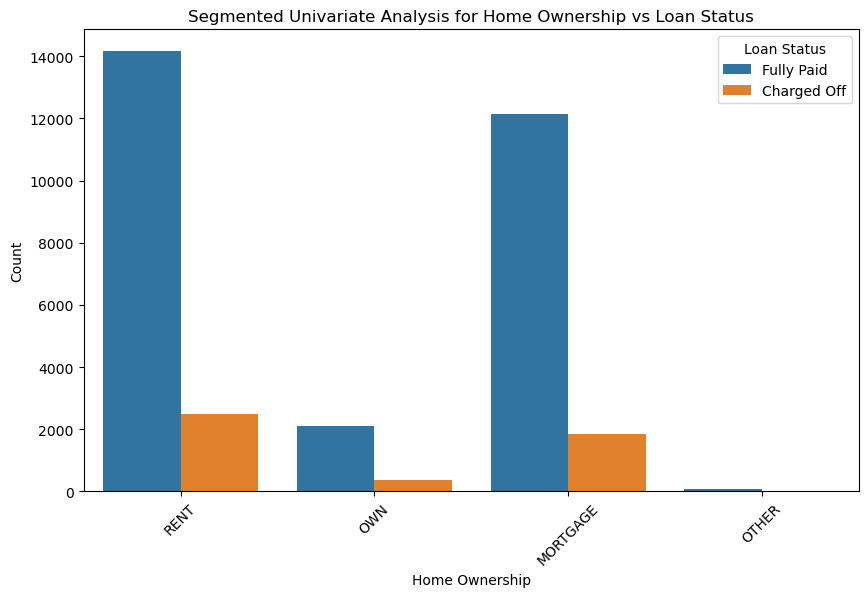

In [70]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='home_ownership', hue='loan_status')
plt.title('Segmented Univariate Analysis for Home Ownership vs Loan Status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=45)
plt.show()

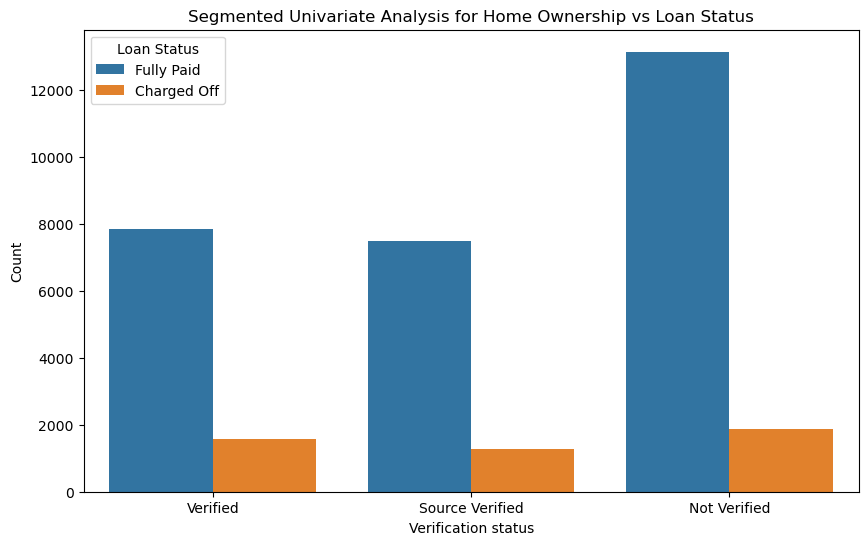

In [71]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='verification_status', hue='loan_status')
plt.title('Segmented Univariate Analysis for Home Ownership vs Loan Status')
plt.xlabel('Verification status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks()
plt.show()

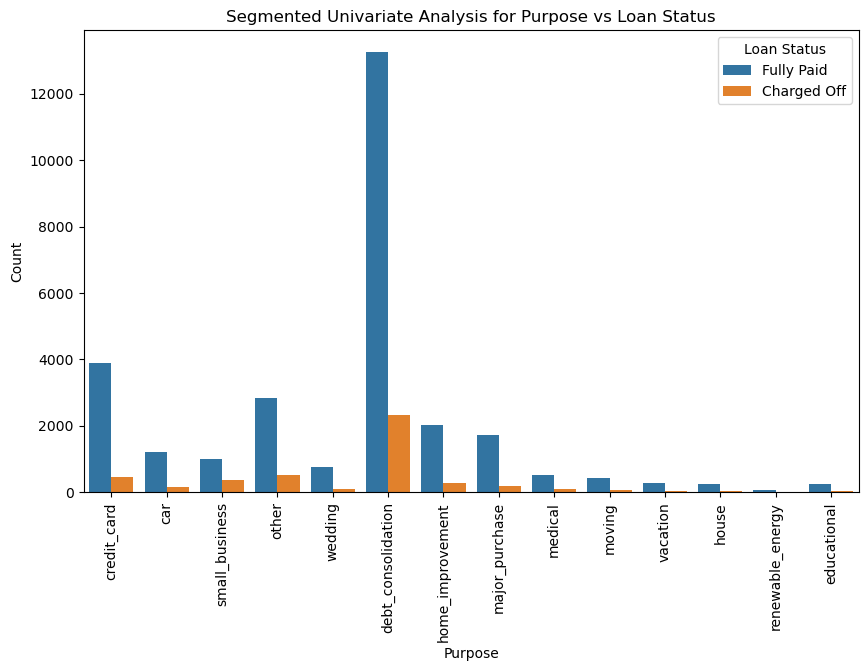

In [72]:
# Perform segmented univariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='purpose', hue='loan_status')
plt.title('Segmented Univariate Analysis for Purpose vs Loan Status')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=90)
plt.show()

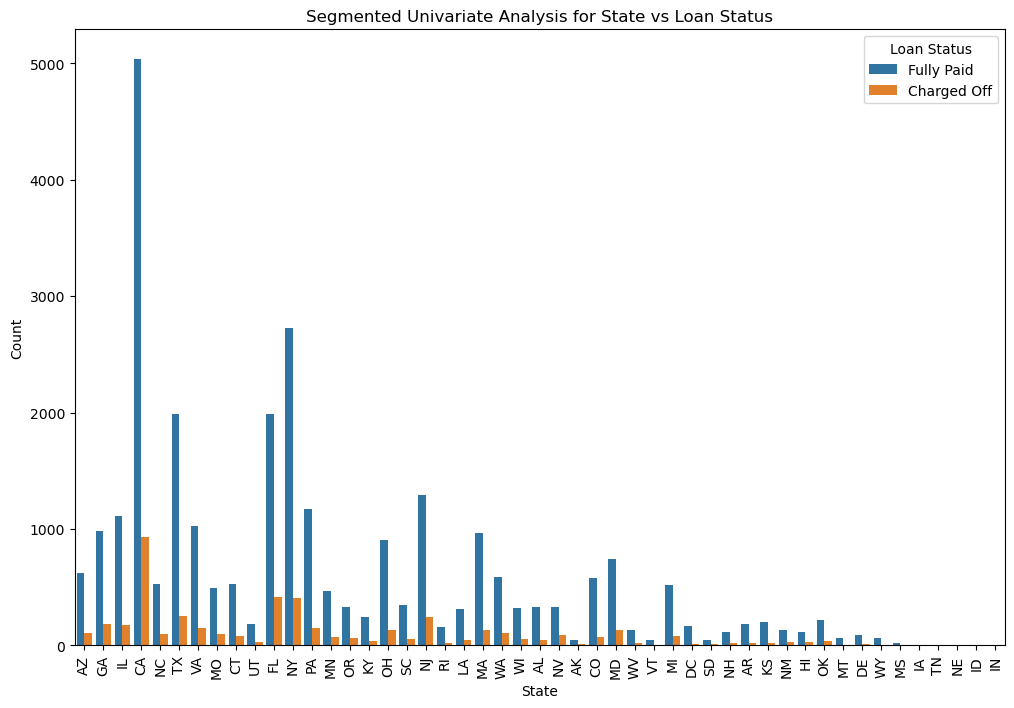

In [73]:
# Perform segmented univariate analysis
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='addr_state', hue='loan_status')
plt.title('Segmented Univariate Analysis for State vs Loan Status')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.xticks(rotation=90)
plt.show()

### Observations

#### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when: 

- Applicants having house_ownership as 'RENT'
- When the purpose is 'debt_consolidation'
- When the loan status is Not verified
- Term of 36 months
- Applicants with employment length of 10
- Grade is 'B'
- Applicants who receive the loan amount ranging 5k - 10k
- Applicants who have an income of range 0 - 40k
- Applicants who receive interest at the rate above 13%
- Applicants who are from the state CA.

## Bivariate Analysis

### Analysing annual income with other columns for more insights 

### 1.Annual income vs loan purpose

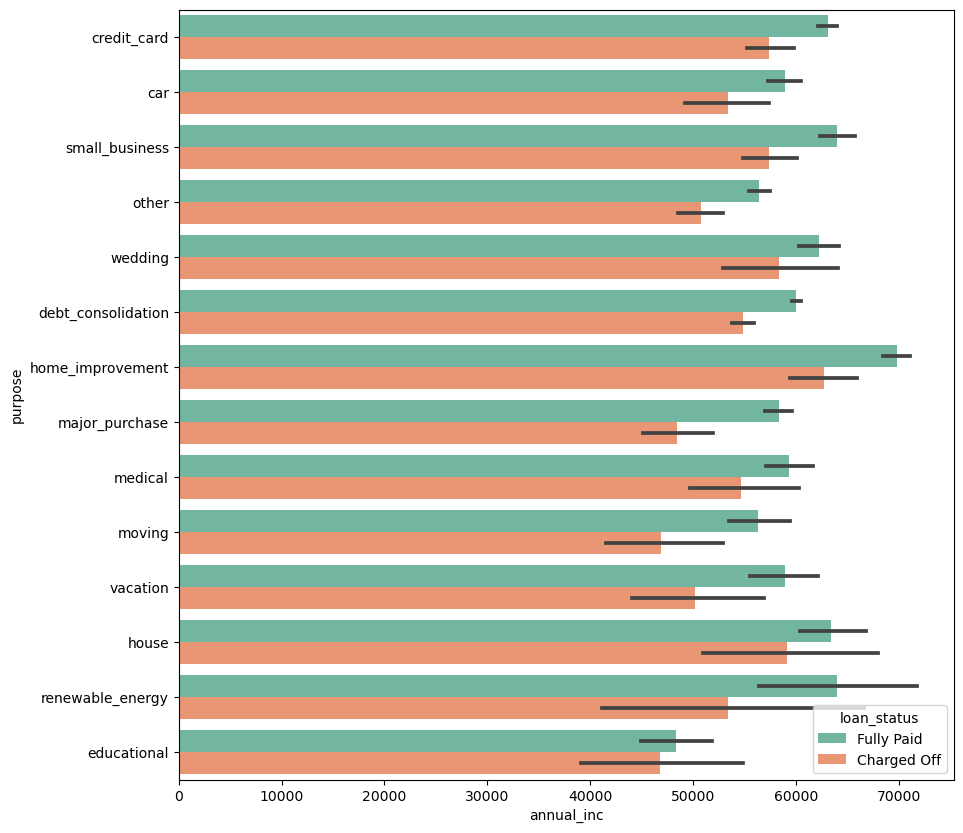

In [74]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='annual_inc', y='purpose', hue ='loan_status', palette="Set2")
plt.show()

#### Observations:
- Though the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest. 
- Applicants with higher salary mostly applied loans for "home_improvment", "house", "renewable_energy" and "small_businesses"

### 2. Annual income vs home ownership

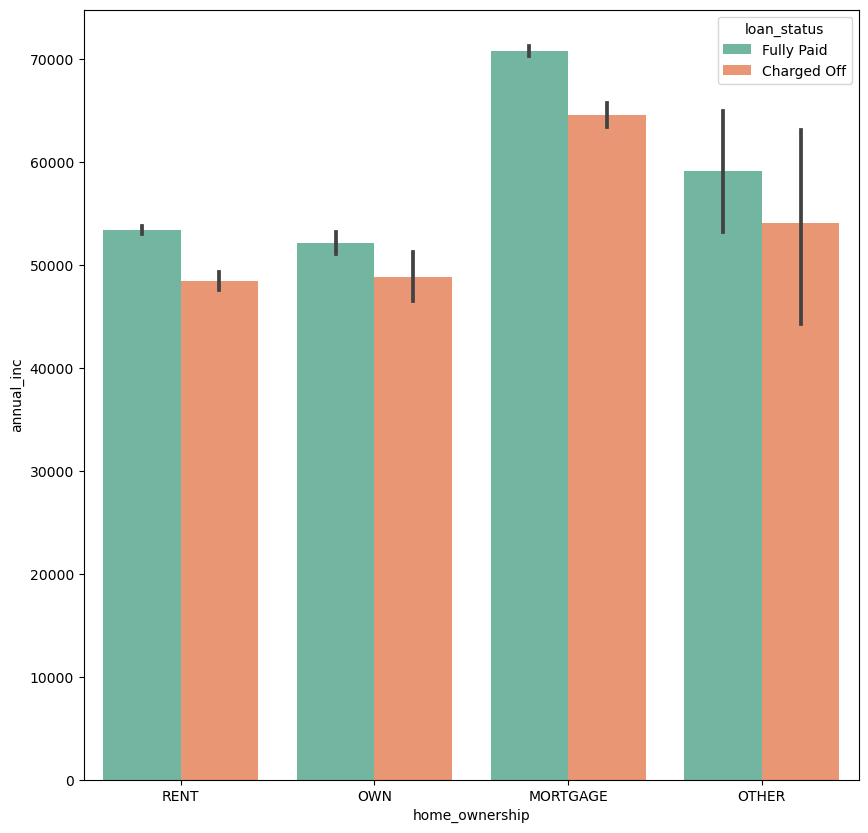

In [75]:
plt.figure(figsize=(10,10))
sns.barplot(data =df, x='home_ownership', y='annual_inc', hue ='loan_status',palette="Set2")
plt.show()

### 3. Annual Income vs Loan amount

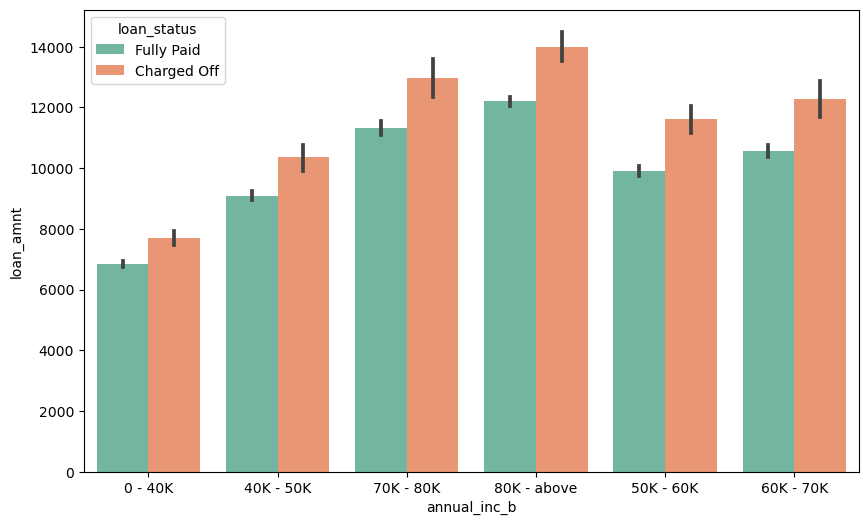

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x = "annual_inc_b", y = "loan_amnt", hue = 'loan_status', data = df, palette="Set2")
plt.show()

#### Observations: 
Across all the income groups, the loan_amount is higher for people who defaulted.

### 4. Annual income vs int_rate

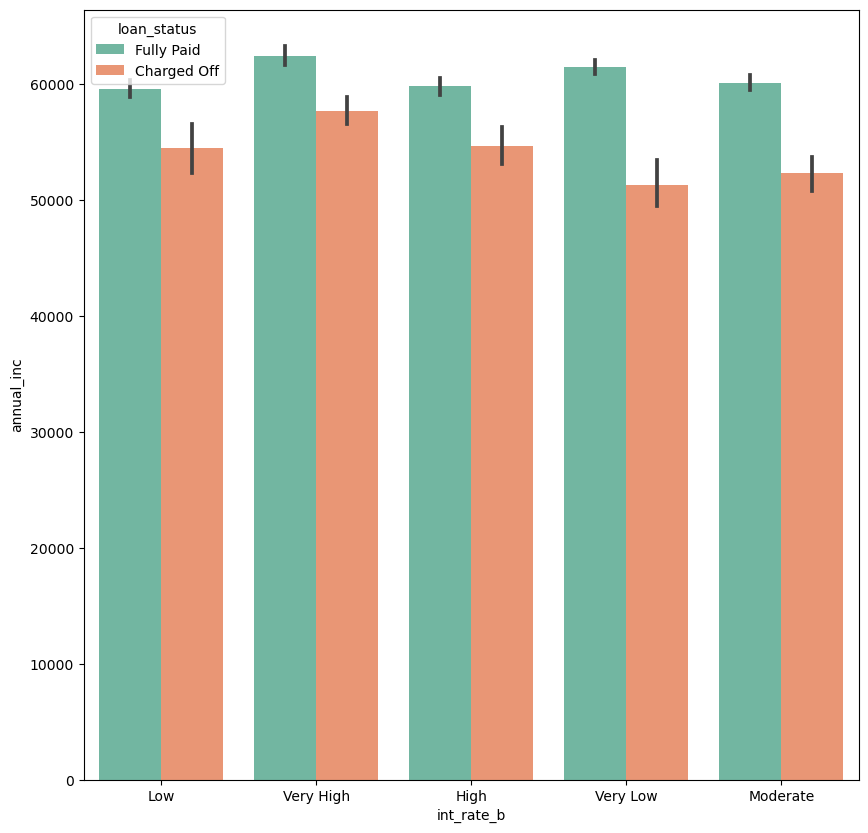

In [77]:
plt.figure(figsize=(10,10))
sns.barplot(data =df, x='int_rate_b', y='annual_inc', hue ='loan_status',palette="Set2")
plt.show()

## Analysing loan_amount with other columns for more insights 

### 1.Loan Amount vs Interest Rate

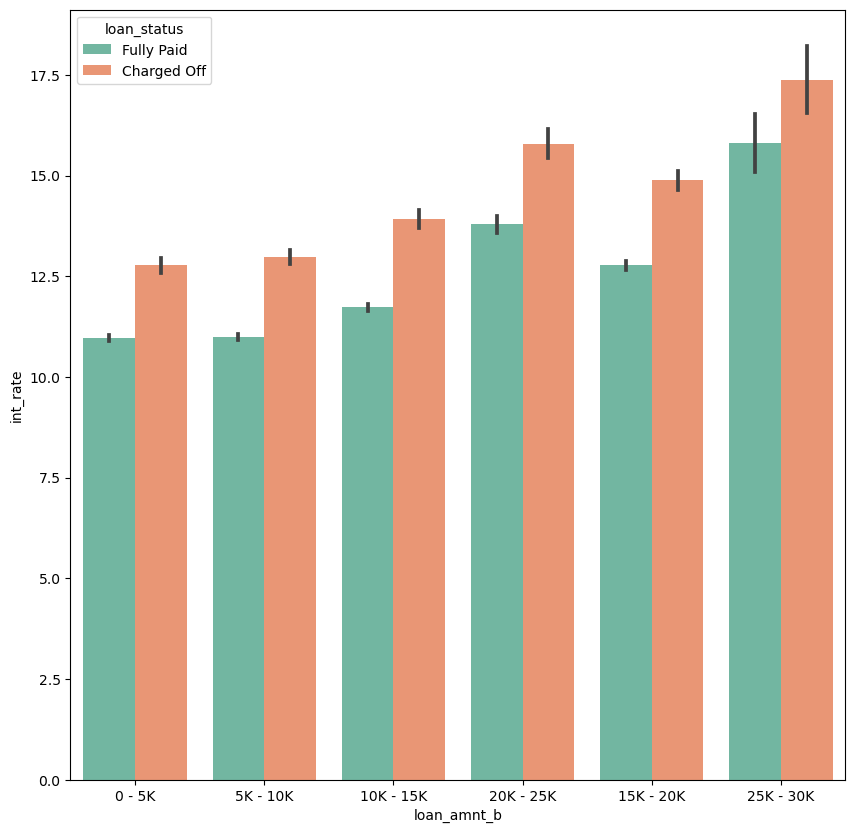

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt_b', y='int_rate', hue ='loan_status',palette="Set2")
plt.show()

### 2. Loan vs purpose

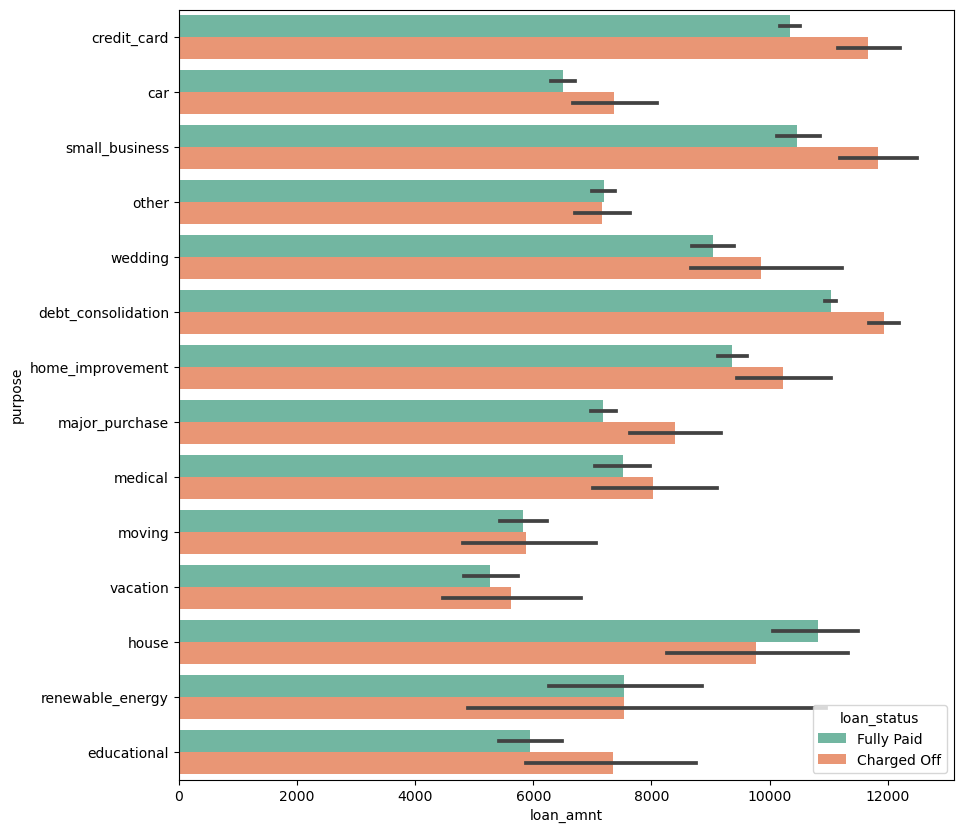

In [79]:
plt.figure(figsize=(10,10))
sns.barplot(data =df, x='loan_amnt', y='purpose', hue ='loan_status',palette="Set2")
plt.show()

### 3. Loan vs House Ownership

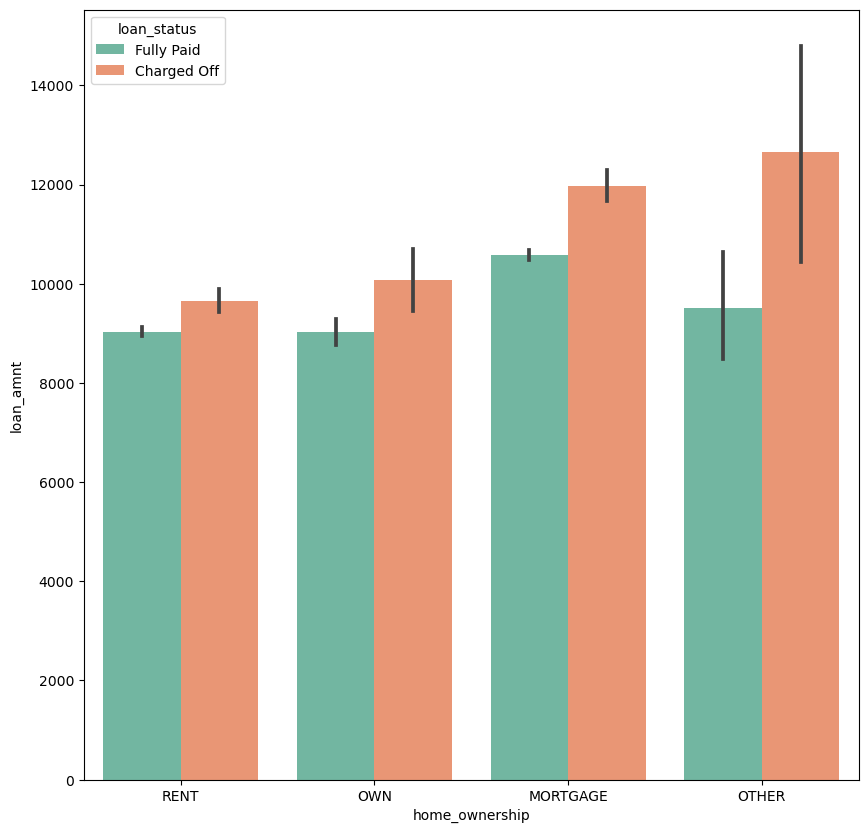

In [80]:
plt.figure(figsize=(10,10))
sns.barplot(data =df, x='home_ownership', y='loan_amnt', hue ='loan_status',palette="Set2")
plt.show()

### 4.Loan amount vs month issued and year issued

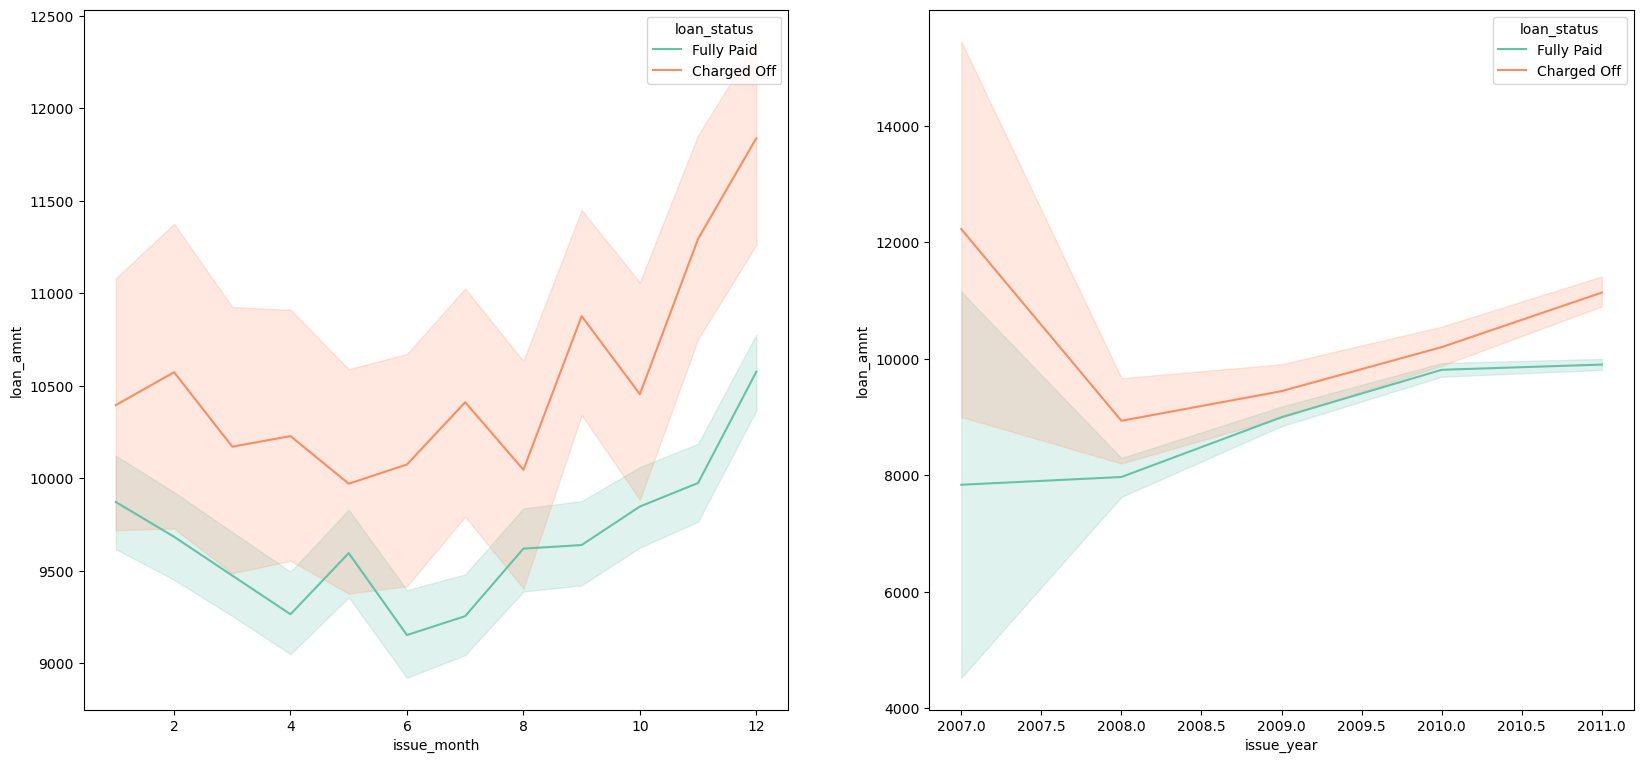

In [81]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =df,y='loan_amnt', x='issue_month', hue ='loan_status',palette="Set2")
plt.subplot(222)
sns.lineplot(data =df,y='loan_amnt', x='issue_year', hue ='loan_status',palette="Set2")
plt.show()

### 5. Loan amount vs Grade

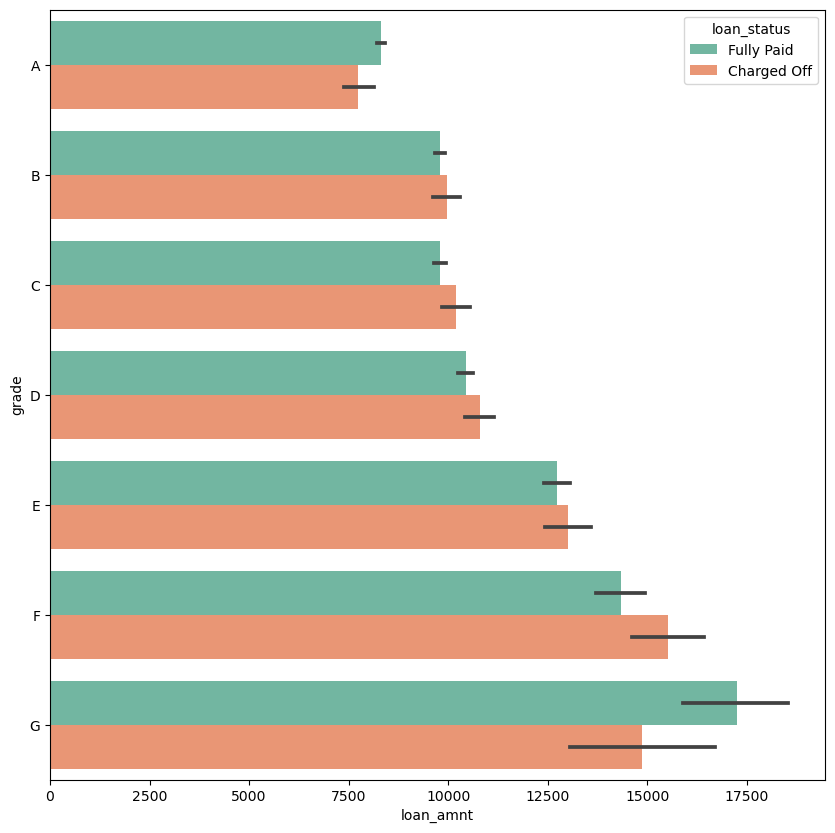

In [82]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='loan_amnt', y='grade', hue ='loan_status',palette="Set2", order=['A','B','C','D','E','F','G'])
plt.show()

### Employment Length vs Loan Amount

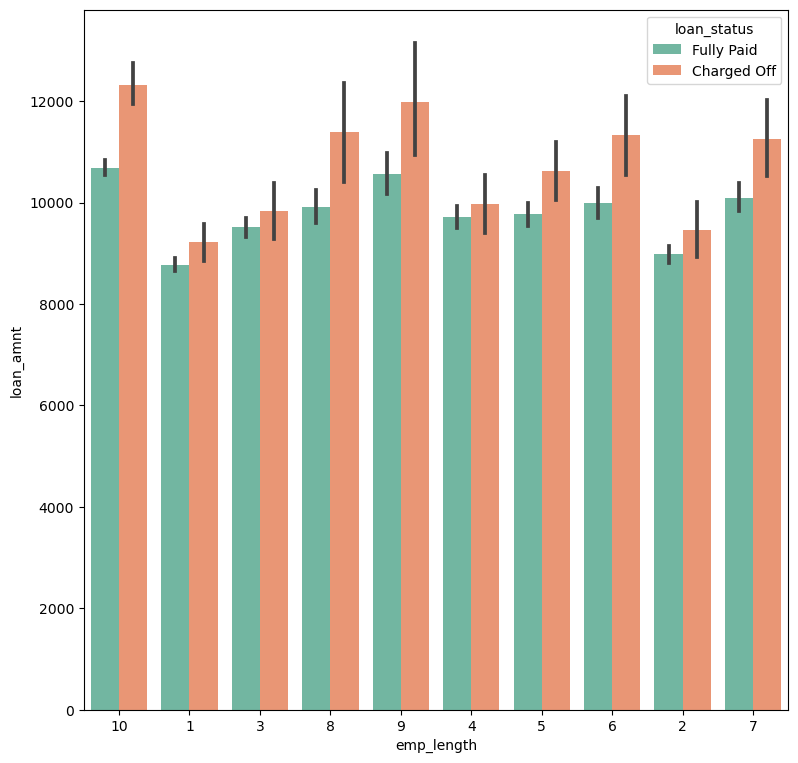

In [83]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =df, x='emp_length', y='loan_amnt', hue ='loan_status',palette="Set2")
plt.show()

#### Observation:
- Employees with longer working history got the loan approved for a higher amount. 

### verification status vs loan amount

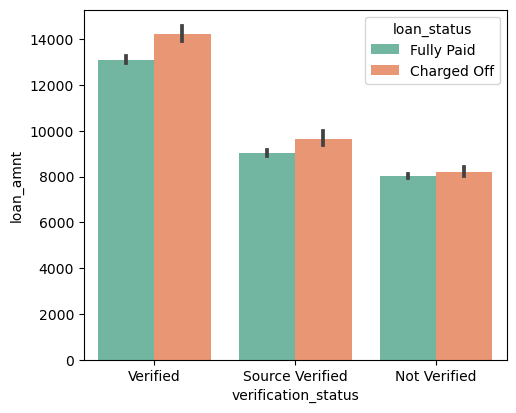

In [84]:
plt.figure(figsize=(12,10))
plt.subplot(222)
sns.barplot(data =df, x='verification_status', y='loan_amnt', hue ='loan_status',palette="Set2")
plt.show()

#### Observation:
- Looking at the verification status data, verified loan applications tend to have higher loan amount. Which might indicate that the firms are first verifying the loans with higher values.

### interest rate vs grade

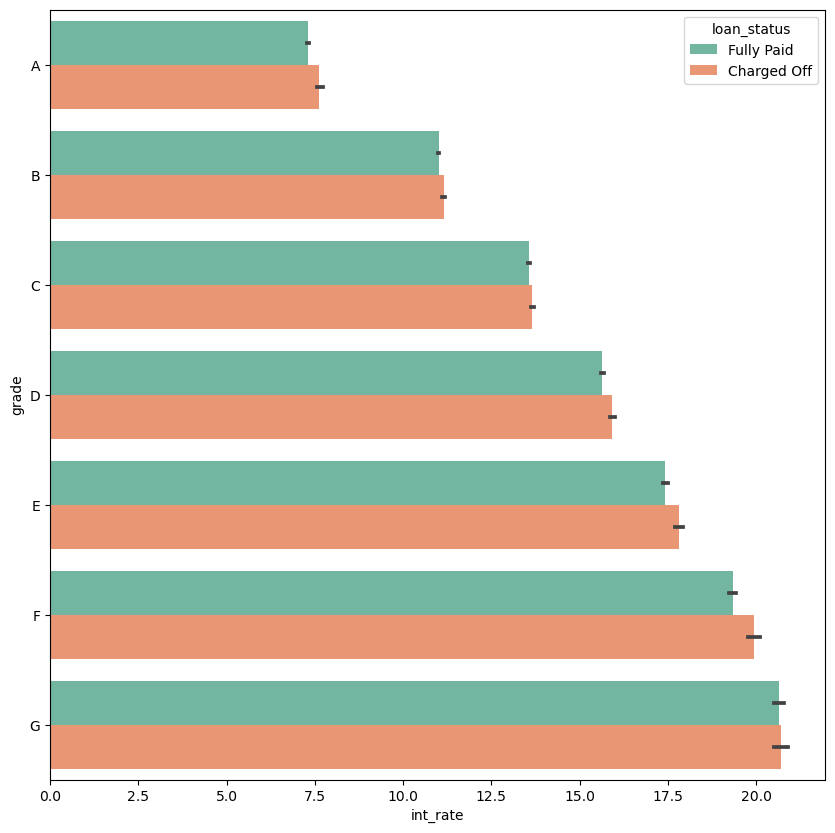

In [85]:
plt.figure(figsize=(10,10))
sns.barplot(data =df,x='int_rate', y='grade', hue ='loan_status',palette="Set2", order=['A','B','C','D','E','F','G'])
plt.show()

### Loan Amount Bucket vs Interest Rate

<Figure size 640x480 with 0 Axes>

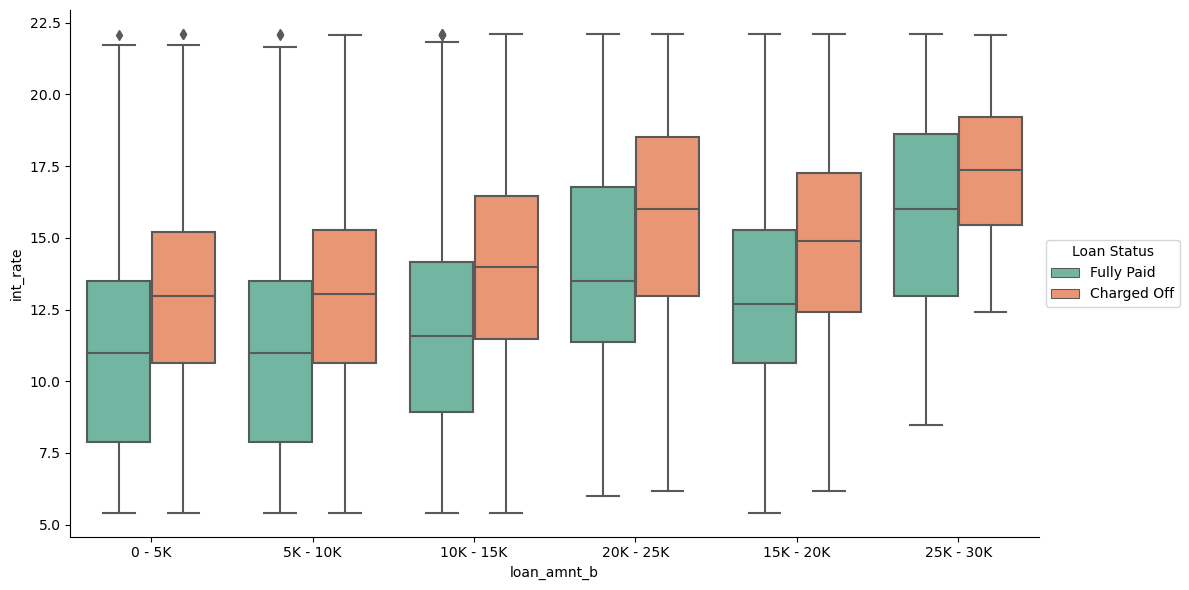

In [86]:
plt.tight_layout()
sns.catplot(data =df, y ='int_rate', x ='loan_amnt_b', hue ='loan_status',palette="Set2",kind = 'box', height=6, aspect=2, legend=False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Loan Status')
plt.tight_layout()
plt.show()

#### Observation:
- The interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups. 
- This can be a pretty strong driving factor for loan defaulting.

### Term vs Loan Amount

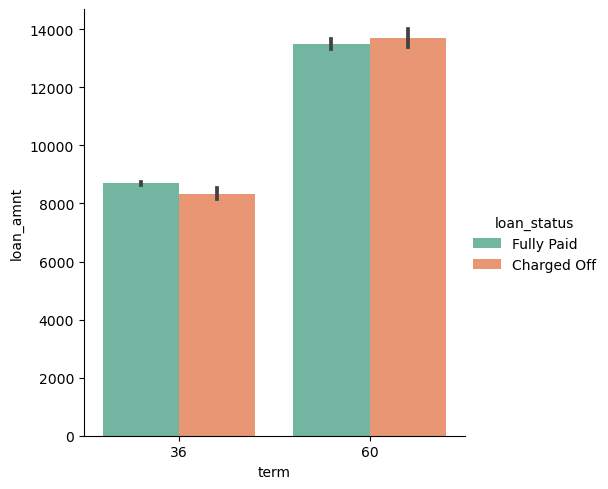

In [87]:
sns.catplot(x = 'term', y = 'loan_amnt', data = df,hue = 'loan_status', palette="Set2", kind = 'bar')
plt.show()

#### Observations:
- Applicants who applied and defaulted have no significant difference in loan_amounts.
- Which means that applicants applying for long term has applied for more loan. 

### Observations

#### The above analysis with respect to the charged off loans. There is a more probability of defaulting when: 

- Applicants taking loan for 'home improvement' and have income of 60k -70k
- Applicants whose home ownership is 'MORTGAGE and have income of 60-70k
- Applicants who receive interest rate above 13% and have an income of 60k-70k
- Applicants who have taken a loan in the range 25k - 30k and are charged interest rate of 15-17.5%
- Applicants who have taken a loan for and dept consolidation small business and also the loan amount is greater than 10k
- Applicants whose home ownership is 'MORTGAGE and have loan of 10-12k
- When grade is F and loan amount is between 15k-20k
- When employment length is 10yrs and loan amount is 10k-12k 
- When the loan is verified and loan amount is above 14k
- For grade G and interest rate above 20%